In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('C:\\Users\\dcL\\Desktop\\StoreRoom\\mook.csv')
df.head()

,ID,CT,Assignment,Unnamed: 3,Presentation,Unnamed: 5,Attendence,Mid,Final,Course,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1001,9,4,NaN,5,NaN,6,22,38,c++,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,13,4,NaN,6,NaN,7,21,36,c++,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,12,4,NaN,5,NaN,4,20,37,c++,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,14,2,NaN,6,NaN,3,19,35,c++,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,8,3,NaN,6,NaN,6,18,38,c++,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop('ID', axis=1)
df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Course', axis=1)
df = df.drop('Unnamed: 5', axis=1)
df = df.drop('Unnamed: 10', axis=1)
df = df.drop('Unnamed: 11', axis=1)
df = df.drop('Unnamed: 12', axis=1)
df = df.drop('Unnamed: 13', axis=1)
df = df.drop('Unnamed: 14', axis=1)
df = df.drop('Unnamed: 15', axis=1)

In [5]:
df.head()

,CT,Assignment,Presentation,Attendence,Mid,Final
0,9,4,5,6,22,38
1,13,4,6,7,21,36
2,12,4,5,4,20,37
3,14,2,6,3,19,35
4,8,3,6,6,18,38


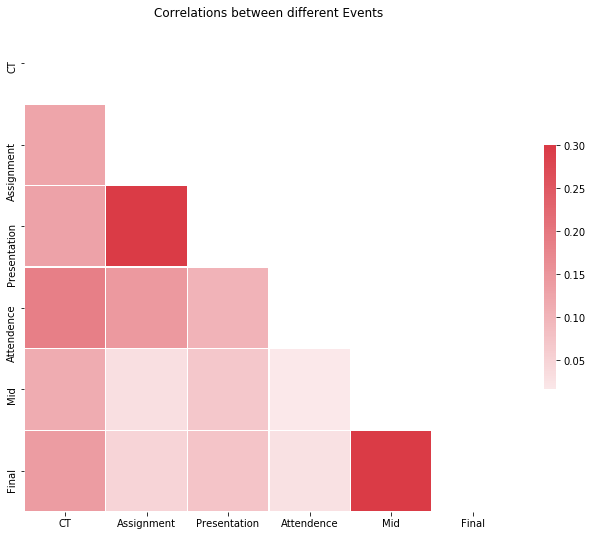

In [6]:
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different Events')
plt.show()

In [7]:
X = df.drop(["Final"],axis=1)
y = df["Final"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(C=.1, degree=1, kernel='poly', probability=True),
   # NuSVC(nu=.1, degree=1, kernel='poly', probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LogisticRegression()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
#         print("accuracy_score: \n",accuracy_score(y_test, train_predictions))
        print("precision_score: \n",precision_score(y_test, train_predictions))
        print("f1_score: \n",f1_score(y_test, train_predictions))
#         print("classification_report: \n",classification_report(y_test, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
        print("log_loss: \n",log_loss(y_test, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 83.3333%
Target is multiclass but average='binary'. Please choose another average setting.
SVC
****Results****
Accuracy: 88.4615%
Target is multiclass but average='binary'. Please choose another average setting.
DecisionTreeClassifier
****Results****
Accuracy: 94.4444%
Target is multiclass but average='binary'. Please choose another average setting.
RandomForestClassifier
****Results****
Accuracy: 92.3077%
Target is multiclass but average='binary'. Please choose another average setting.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier
****Results****
Accuracy: 42.7350%
Target is multiclass but average='binary'. Please choose another average setting.
GradientBoostingClassifier
****Results****
Accuracy: 94.0171%
Target is multiclass but average='binary'. Please choose another average setting.
GaussianNB
****Results****
Accuracy: 85.0427%
Target is multiclass but average='binary'. Please choose another average setting.
LinearDiscriminantAnalysis
****Results****
Accuracy: 87.6068%
Target is multiclass but average='binary'. Please choose another average setting.
LogisticRegression
****Results****
Accuracy: 58.5470%
Target is multiclass but average='binary'. Please choose another average setting.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.5854700854700855


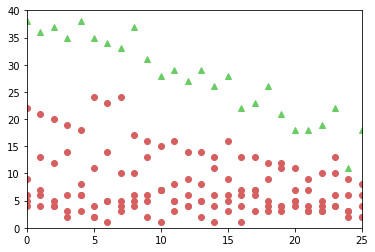

In [22]:
plt.plot(X,'ro',y,'g^')
plt.axis([0,25,0,40])
plt.show()

ModuleNotFoundError: No module named 'tensorflow'